<a href="https://colab.research.google.com/github/cuzmyk/machine_learning/blob/main/2s_3pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from keras.utils import to_categorical

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [3]:
print(trainy.shape)
print(testy.shape)

(60000,)
(10000,)


## 1.3. Визуализируем часть данных из датасета

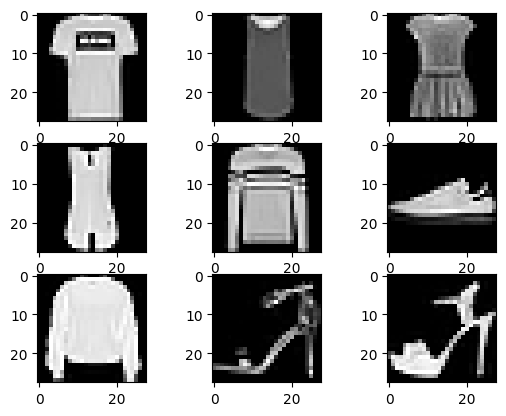

In [4]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [5]:
model = Sequential([
    Conv2D(6, (5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(16, (5,5), strides=(1,1), activation='tanh'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(units=120,activation='tanh'),
    Dense(units=84,activation='tanh'),
    Dense(units=10,activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [6]:
trainX = trainX / 255
testX = testX / 255

trainy = to_categorical(trainy, 10)
testy = to_categorical(testy, 10)

trainX = np.expand_dims(trainX, axis=3)
testX = np.expand_dims(testX, axis=3)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)
print(trainy.shape)
print(testy.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [7]:
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

m = model.fit(trainX, trainy, batch_size=32, epochs=EPOCH, validation_split=0.2)

model.evaluate(testX, testy)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7218 - loss: 0.7558 - val_accuracy: 0.8417 - val_loss: 0.4454
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8464 - loss: 0.4248 - val_accuracy: 0.8494 - val_loss: 0.4127
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8587 - loss: 0.3783 - val_accuracy: 0.8638 - val_loss: 0.3765
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8606 - loss: 0.3978


[0.39450040459632874, 0.8580999970436096]

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

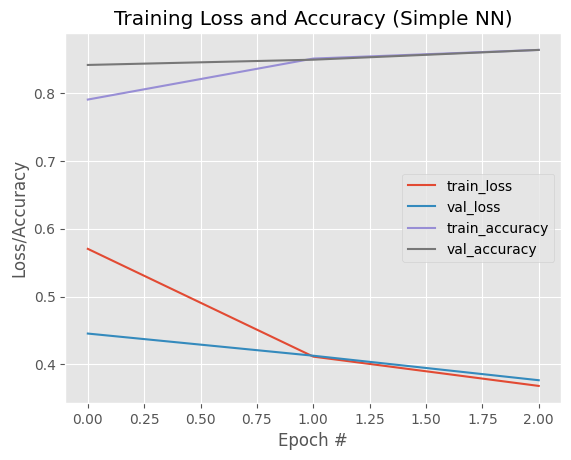

In [8]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, m.history["loss"], label="train_loss")
plt.plot(N, m.history["val_loss"], label="val_loss")
plt.plot(N, m.history["accuracy"], label="train_accuracy")
plt.plot(N, m.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [9]:
label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files

count = 0

while count != 5:
  uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
  image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
  image = cv2.bitwise_not(image) # Инверсия цветов
  orig = image
  image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

  cv2_imshow(orig)

  preds = model.predict(image)
  print(preds)

  i = preds.argmax(axis=1)[0]
  print(f"Found: {label[i]}\n")

  count += 1

Saving 2.PNG to 2.PNG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[1.8916846e-05 3.3467214e-03 2.4576748e-03 1.4204377e-02 4.5550037e-03
  6.3120748e-04 5.6326954e-04 1.4234855e-02 9.1969478e-01 4.0293202e-02]]
Found: Bag



Saving 2.PNG to 2 (1).PNG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[1.8916846e-05 3.3467214e-03 2.4576748e-03 1.4204377e-02 4.5550037e-03
  6.3120748e-04 5.6326954e-04 1.4234855e-02 9.1969478e-01 4.0293202e-02]]
Found: Bag



Saving 2.PNG to 2 (2).PNG


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[4.7717571e-01 5.7383423e-04 4.0295181e-01 1.0571167e-02 2.7114709e-03
  2.4998675e-05 6.5982319e-02 4.3148243e-06 3.5148971e-02 4.8553417e-03]]
Found: T-shirt/top



Saving 1.jpg to 1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[3.5407633e-01 2.0049319e-03 2.3083800e-01 1.3827711e-03 1.2340658e-02
  3.7649982e-06 3.9607292e-01 5.2035895e-05 3.2136363e-03 1.4949423e-05]]
Found: Shirt



IndexError: list index out of range

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [11]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten

from keras.utils import to_categorical

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

In [12]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/WA8k7NGVrqm7hQ) -o arch.zip
! unzip -qq arch.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 95.5M  100 95.5M    0     0  15.9M      0  0:00:05  0:00:05 --:--:-- 23.3M


In [13]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Vegetable Images/train")))

random.shuffle(imagePaths)

[INFO] loading images...


In [14]:
# формируем выборку
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)) # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон)

	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [15]:
data = np.array(data, dtype="float") #/ 255.0
labels = np.array(labels)

In [16]:
# формируем обучающую и валидационную выборки
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250, 3)
(750, 3)


In [17]:
# нормализация данных и преобраазование в массив numpy
trainX = trainX / 255
testX = testX / 255

# trainY = to_categorical(trainY, 3)
# testY = to_categorical(testY, 3)

#trainX = np.expand_dims(trainX, axis=-1)
#testX = np.expand_dims(testX, axis=-1)

labels = np.array(labels)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250, 3)
(750, 3)


In [18]:
# архитектура модели
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2), strides=2),
    # Conv2D(64, (3,3), padding='same', activation='relu'),
    # MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(12, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │          98,316 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,251 (387.70 KB)

 Trainable params: 99,251 (387.70 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# параметры + компиляция
EPOCHS = 10

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
# добавляем коллбэки
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)   # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3_1.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [21]:
# запускаем обучение
H = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6292 - loss: 0.8721 - val_accuracy: 0.9107 - val_loss: 0.3033
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9130 - loss: 0.2655 - val_accuracy: 0.9613 - val_loss: 0.1741
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9513 - loss: 0.1515 - val_accuracy: 0.9720 - val_loss: 0.1058
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9638 - loss: 0.1210 - val_accuracy: 0.9800 - val_loss: 0.0845
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9800 - loss: 0.0882 - val_accuracy: 0.9813 - val_loss: 0.0723
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9875 - loss: 0.0668 - val_accuracy: 0.9827 - val_loss: 0.0763
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9845 - loss: 0.0630 - val_accuracy: 0.9827 - val_loss: 0.0584
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9884 - loss: 0.0550 - val_accuracy: 0.9720 

In [22]:
# загрузка лучшей модели
from keras.models import load_model

model = load_model("/content/best_model_3_1.keras")

In [23]:
# следующие шаги: оценка точности, проверка модели (визуаизация Gradio)
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

      Carrot       0.99      0.99      0.99       267
    Cucumber       0.97      1.00      0.98       251
      Radish       0.99      0.96      0.97       232

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


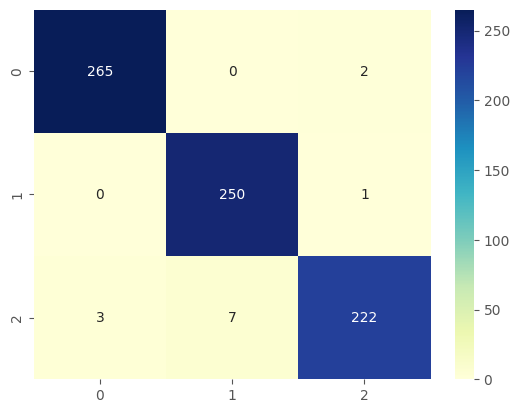

In [24]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

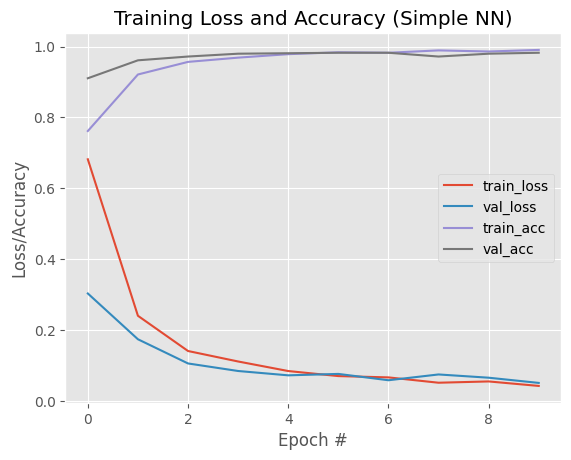

In [25]:
# строим графики потерь и точности
EPOCHS = 10

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [26]:
def save_model_and_labels(model, lb, model_path = "model_3_1.h5", labels_path = "label_bin_3_1"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

model_path = "model_3_1.h5"
labels_path = "label_bin_3_1"

save_model_and_labels(model, lb, model_path, labels_path)

In [27]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [28]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2
import numpy as np

In [29]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    image = image[:, :, ::-1]                 # поменять каналы местами (RGB на BGR)
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с моделью
    image = image.reshape(-1, 32, 32, 3)

    return image

In [30]:
# Функция прогноза по модели
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_3_1.h5", label_path = "/content/label_bin_3_1"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [31]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/Vegetable Images/train/Carrot/0001.jpg",
              "/content/Vegetable Images/train/Cucumber/0001.jpg",
              "/content/Vegetable Images/train/Radish/0003.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://27b6fc3d61df6f54e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


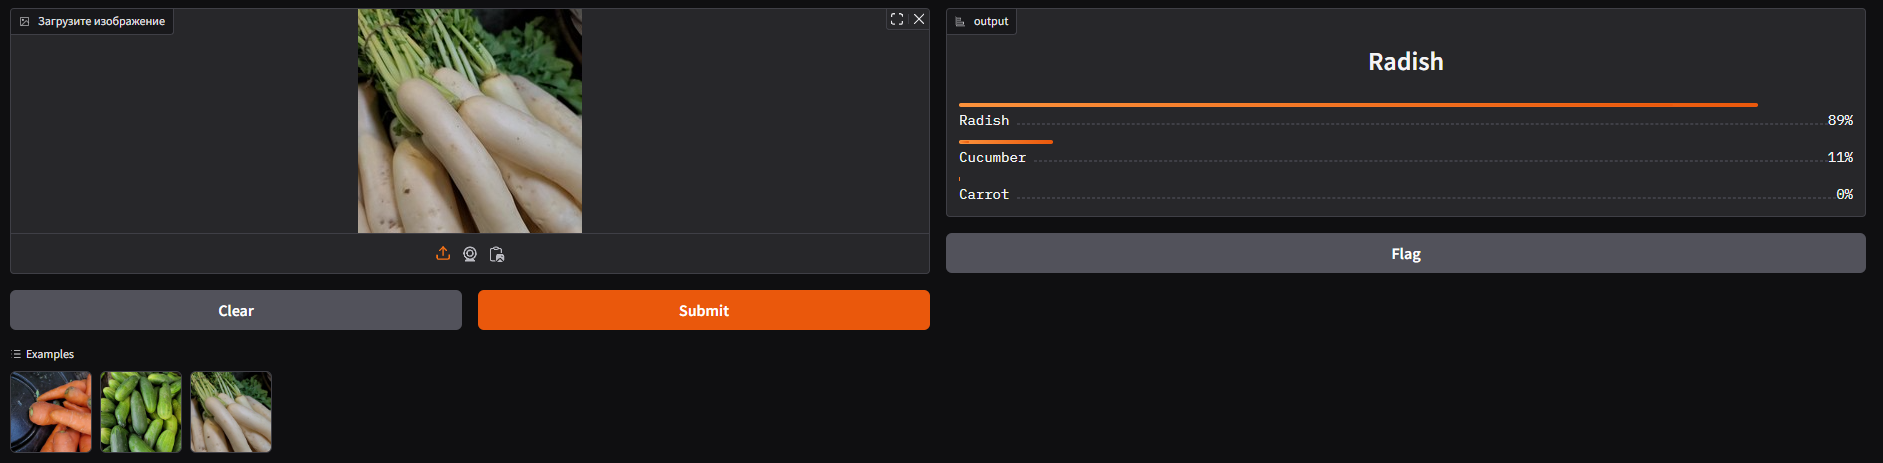

Хорошо определяет все овощи, но возможны ошибки, если  на фоне есть посторонние объекты цвета схожего с другим овощем

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [33]:
# вариация архитектуры GoogLeNet
model = Sequential([
    Conv2D(8, (1,1), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(16, (3,3), padding='same', activation='relu'),
    Conv2D(16, (5,5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(12, activation='relu'),
    Dense(3,  activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# параметры + компиляция
EPOCHS = 10

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
# добавляем коллбэки
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3_2.keras",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [36]:
# запускаем обучение
H = model.fit(trainX, trainY,
              validation_data=(testX, testY),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.5146 - loss: 0.9723 - val_accuracy: 0.6147 - val_loss: 0.7651
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - accuracy: 0.7234 - loss: 0.6867 - val_accuracy: 0.8853 - val_loss: 0.4561
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.9066 - loss: 0.3977 - val_accuracy: 0.9600 - val_loss: 0.1581
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.9481 - loss: 0.1636 - val_accuracy: 0.9693 - val_loss: 0.1017
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9698 - loss: 0.1028 - val_accuracy: 0.9813 - val_loss: 0.0673
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.9776 - loss: 0.0754 - val_accuracy: 0.9907 - val_loss: 0.0489
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 334ms/step - accuracy: 0.9835 - loss: 0.0641 - val_accuracy: 0.9893 - val_loss: 0.0425
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.9879 - loss: 0.0526 - val_accurac

In [37]:
# загрузка лучшей модели
from keras.models import load_model

model = load_model("/content/best_model_3_2.keras")

In [38]:
# следующие шаги: оценка точности, проверка модели (визуаизация Gradio)
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

      Carrot       1.00      0.99      0.99       267
    Cucumber       1.00      0.99      1.00       251
      Radish       0.98      1.00      0.99       232

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


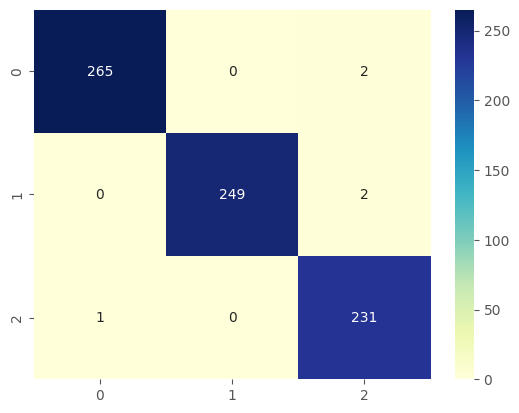

In [39]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

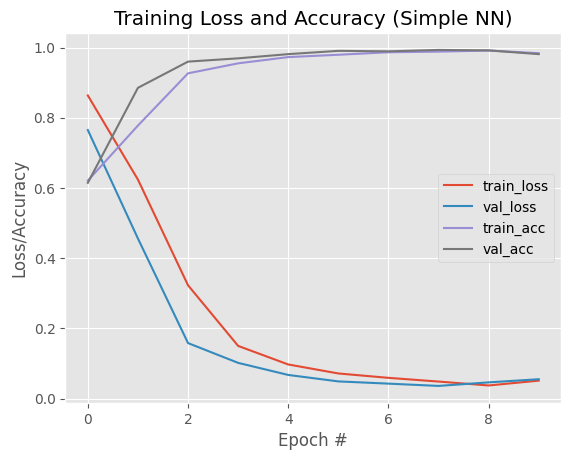

In [40]:
# строим графики потерь и точности
EPOCHS = 10

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

In [41]:
def save_model_and_labels(model, lb, model_path = "model_3_2.h5", labels_path = "label_bin_3_2"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

model_path = "model_3_2.h5"
labels_path = "label_bin_3_2"

save_model_and_labels(model, lb, model_path, labels_path)

In [42]:
# Функция прогноза по модели
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_3_2.h5", label_path = "/content/label_bin_3_2"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

In [43]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/Vegetable Images/train/Carrot/0001.jpg",
              "/content/Vegetable Images/train/Cucumber/0001.jpg",
              "/content/Vegetable Images/train/Radish/0003.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://59c86d32fec8374f31.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


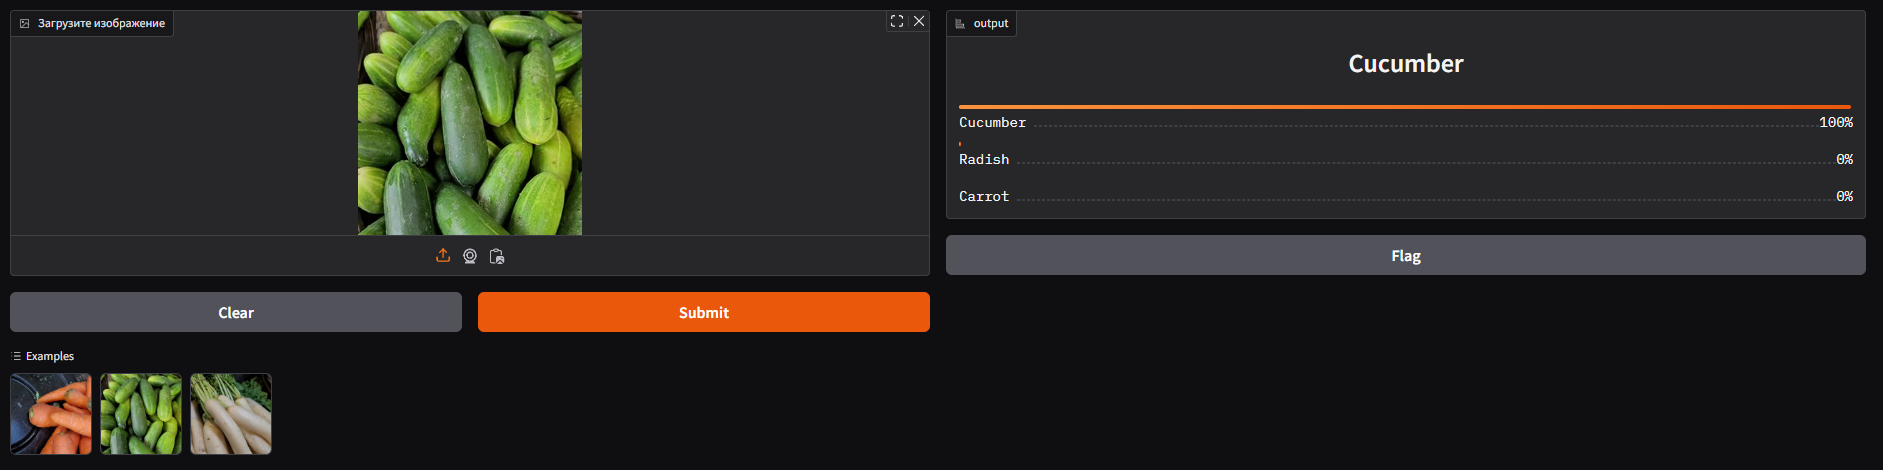

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
!pip install gradio

In [ ]:
from keras.models import load_model
import gradio as gr
import pickle
import cv2
import numpy as np

In [45]:
# ПЕРВАЯ МОДЕЛЬ

# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    image = image[:, :, ::-1]
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

# Функция прогноза по модели
def predict_image(img, preprocess_func = preprocess_image, model_path = "/content/model_3.h5", label_path = "/content/label_bin_3"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/Vegetable Images/train/Carrot/0001.jpg",
              "/content/Vegetable Images/train/Cucumber/0001.jpg",
              "/content/Vegetable Images/train/Radish/0003.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a8a844b31cfea9153.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Результаты**

Морковь:
1. 100%
2. 100%
3. 99%

Огурец:
1. 100%
2. 100%
3. 100%

Редис:
1. 100%
2. 92%
3. 97%



In [46]:
# ВТОРАЯ МОДЕЛЬ

# загрузка лучшей модели
from keras.models import load_model

model = load_model("/content/model_3_1.h5")

Saving 0026.jpg to 0026 (1).jpg


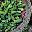

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0. 1. 0.]]
Found: Cucumber



Saving 0012.jpg to 0012 (1).jpg


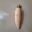

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0. 0. 1.]]
Found: Radish



Saving 0005.jpg to 0005 (2).jpg


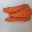

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1. 0. 0.]]
Found: Carrot



KeyboardInterrupt: 

In [52]:
label = ['Carrot', 'Cucumber', 'Radish']

import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files

count = 0

while count != 15:
  uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(list(uploaded.keys())[0])
  image = cv2.resize(image, (32, 32)) # Изменение разрешения изображения
  orig = image
  image = image.reshape(-1, 32, 32, 3) # Приводим изображение из вида (32,32) в вид (1, 32, 32, 3)

  cv2_imshow(orig)

  preds = model.predict(image)
  print(preds)

  i = preds.argmax(axis=1)[0]
  print(f"Found: {label[i]}\n")

  count += 1

In [48]:
# ТРЕТЬЯ МОДЕЛЬ

# загрузка лучшей модели
from keras.models import load_model

model = load_model("/content/model_3_2.h5")

Saving 0012.jpg to 0012.jpg


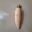

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0. 0. 1.]]
Found: Radish



Saving 0013.jpg to 0013.jpg


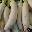

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0. 0. 1.]]
Found: Radish



Saving 0011.jpg to 0011.jpg


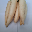

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0. 0. 1.]]
Found: Radish



Saving 0026.jpg to 0026.jpg


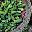

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0. 1. 0.]]
Found: Cucumber



Saving 0005.jpg to 0005 (1).jpg


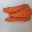

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1. 0. 0.]]
Found: Carrot



Saving 0002.jpg to 0002.jpg


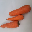

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[1. 0. 0.]]
Found: Carrot



Saving 0024.jpg to 0024.jpg


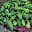

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0. 1. 0.]]
Found: Cucumber



KeyboardInterrupt: 

In [51]:
label = ['Carrot', 'Cucumber', 'Radish']

import cv2
from google.colab.patches import cv2_imshow

# Добавляем интерфейс для загрузки изображений напрямую из блокнота
from google.colab import files

count = 0

while count != 15:
  uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
  image = cv2.imread(list(uploaded.keys())[0])
  image = cv2.resize(image, (32, 32)) # Изменение разрешения изображения
  orig = image
  image = image.reshape(-1, 32, 32, 3) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)

  cv2_imshow(orig)

  preds = model.predict(image)
  print(preds)

  i = preds.argmax(axis=1)[0]
  print(f"Found: {label[i]}\n")

  count += 1

**Результат:**


*   Модель из второго задания различила все образцы, но редис распознаёт не со 100% точностью
*   Модель свёрточной сети и на очнове архитектуры GoogleNet распознали все образцы


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [84]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [85]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [86]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

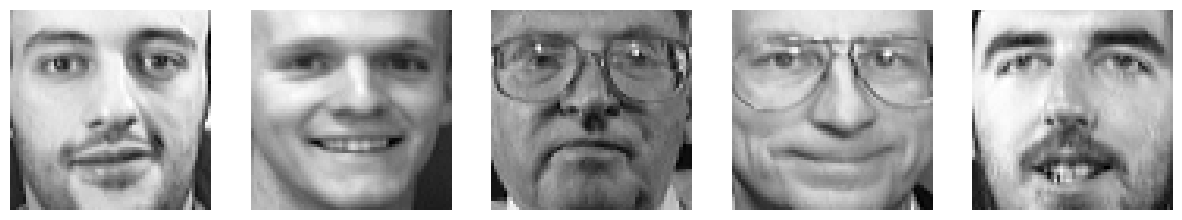

In [87]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [88]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [89]:
X_train.shape

(320, 32, 64)

In [90]:
X_train = X_train / 255
X_test = X_test / 255

#trainY = to_categorical(trainY, 3)
#testY = to_categorical(testY, 3)

#X_train = np.expand_dims(X_train, axis=-1)
#X_test = np.expand_dims(X_test, axis=-1)

X_train.shape
X_test.shape

(80, 32, 64)

Вот один пример обучающей пары.

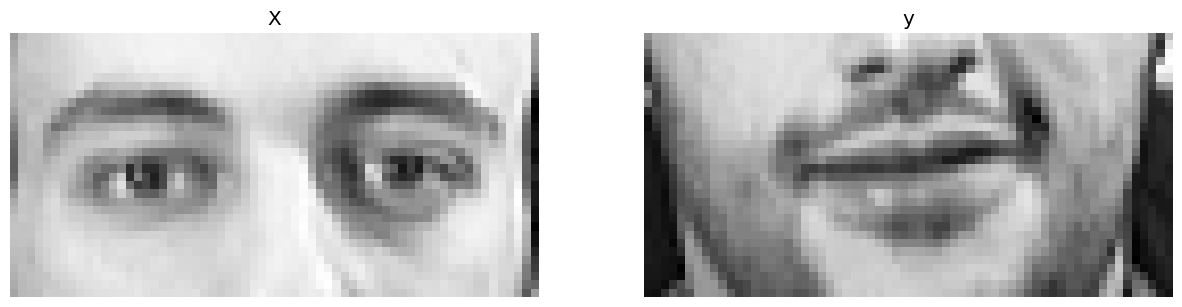

In [91]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [92]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [93]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 64, 1)),
    #MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (5,5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096,  activation='relu'),
    Dense(2048,  activation='sigmoid'),
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 32, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 15, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 13440)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │      55,054,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │       8,390,656 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,668,736 (242.88 MB)

 Trainable params: 63,668,736 (242.88 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [94]:
# параметры + компиляция
EPOCHS = 100

model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy', 'mse'])

In [95]:
# добавляем коллбэки
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5)   # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3_3.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [96]:
H = model.fit(X_train, y_train_n,
              validation_data=(X_test, y_test_n),
              epochs=EPOCHS,
              batch_size=40,
              callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0012 - loss: 0.0273 - mse: 0.0273    

8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.0021 - loss: 0.0273 - mse: 0.0273 - val_accuracy: 0.0000e+00 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.0290 - loss: 0.0232 - mse: 0.0232 - val_accuracy: 0.0000e+00 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0032 - loss: 0.0230 - mse: 0.0230

8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.0035 - loss: 0.0229 - mse: 0.0229 - val_accuracy: 0.0125 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.0123 - loss: 0.0211 - mse: 0.0211 - val_accuracy: 0.0000e+00 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.0355 - loss: 0.0202 - mse: 0.0202 - val_accuracy: 0.0000e+00 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0075 - loss: 0.0213 - mse: 0.0213

8/8 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.0084 - loss: 0.0213 - mse: 0.0213 - val_accuracy: 0.0375 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.0062 - loss: 0.0211 - mse: 0.0211 - val_accuracy: 0.0375 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.0044 - loss: 0.0206 - mse: 0.0206 - val_accuracy: 0.0375 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.0187 - loss: 0.0204 - mse: 0.0204 - val_accuracy: 0.0000e+00 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0395 - loss: 0.0215 - mse: 0.0215 - val_accuracy: 0.0000e+00 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0088 - loss: 0.0207 - mse: 0.0207 - val_accuracy: 0.0375 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy

In [103]:
# загрузка лучшей модели
from keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

model = load_model("/content/best_model_3_3.h5", custom_objects={'mse': MeanSquaredError()})

## 3.5. Сделайте предсказания на тестовых данных

In [104]:
preds = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step


In [105]:
preds.shape

(80, 2048)

## 3.6. Посчитайте метрику качества на тестовых данных

In [106]:
#print(classification_report(y_test_n.argmax(axis=1),
#	preds.argmax(axis=1), target_names='face'))

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.115240678191185

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [107]:
pred_test = preds.reshape((preds.shape[0], 32, 64))
pred_test.shape

(80, 32, 64)

Отрисуйте все предсказания.

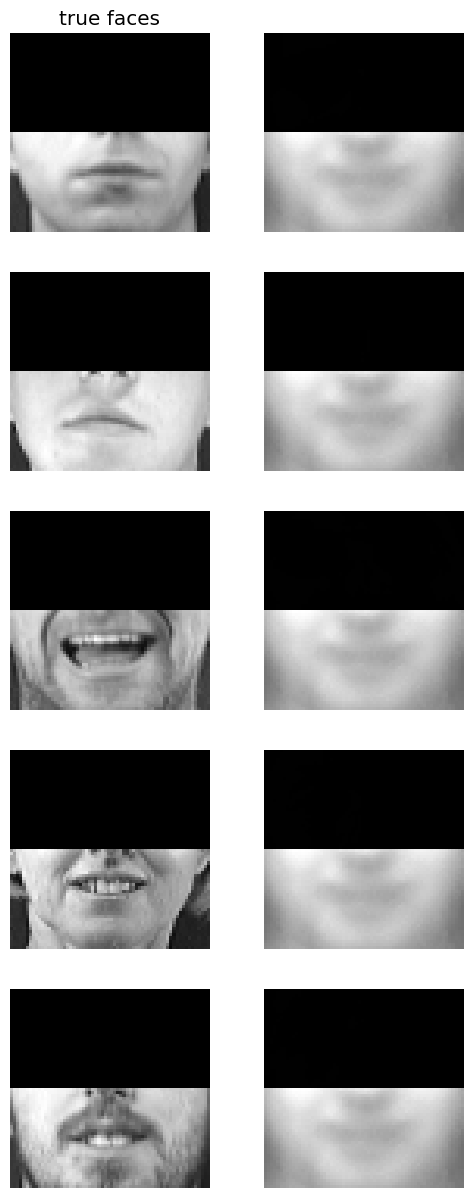

In [108]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )